<a href="https://colab.research.google.com/github/osmarbraz/exemplos_python/blob/master/ExemplosPythonRedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais em Python no Google Colaboratory

https://medium.com/@lucasoliveiras/introdu%C3%A7%C3%A3o-a-deep-learning-redes-neurais-e-tensorflow-77d8618464e6

-----------------------------------------
**Guia Colab Iniciante:**

https://medium.com/machina-sapiens/google-colab-guia-do-iniciante-334d70aad531

**Documentação oficial:**

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb

**Características :**

https://colab.research.google.com/notebooks/basic_features_overview.ipynb

## Exemplo 1 XOR

![alt text](https://miro.medium.com/max/788/1*ep_f4c9ppMoAtnLLaVF-yw.png)

Importando as bibliotecas

In [ ]:
%tensorflow_version 1.x 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

TensorFlow 1.x selected.
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Entrada
binary_i = np.array([[0,0], [0,1], [1,0], [1,1]])

# Saída
binary_o = np.array([[0], [1], [1], [0]])

Temos que criar dois tensores, que serão alimentados durante o treino com os valores de entrada e saída.

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, 2), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

Podemos agora definir a estrutura da nossa rede neural.

![alt text](https://miro.medium.com/max/1016/1*X8HY2i7s02Zsy7Lr4jomtA.png)

In [ ]:
# Arquitetura da rede
n_inputs = 2
n_hidden1 = 3
n_outputs = 1

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1-new", activation=tf.nn.sigmoid)
logits = tf.layers.dense(hidden1, n_outputs, name="outputs-new")

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Acredito que o treinamento da rede neural é um dos passos mais importantes, portanto, vamos definir qual algoritmo será usado.

In [ ]:
erroestimado = 0.1
numero_epocas = 1000

custo = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
otimizador = tf.train.AdamOptimizer(erroestimado)
training_op = otimizador.minimize(custo)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 Agora podemos realizar o treinamento da rede.

In [ ]:
predicao = tf.nn.sigmoid(logits)
init = tf.global_variables_initializer()
cont = 1
with tf.Session() as sessao:
    
    # Inicia a sessao de treinamento
    sessao.run(init)
    for i in range(numero_epocas):
        sessao.run(training_op, feed_dict={X: binary_i, y: binary_o})
    
    print("Treino completo!")
    
    # Mostra a predição
    predicao = sessao.run(predicao, feed_dict={X: binary_i})
    print("Predição: ")
    print(predicao)
    print("Arredondando")
    print(np.round(predicao))

Treino completo!
Predição: 
[[4.0942457e-05]
 [9.9938893e-01]
 [9.9928027e-01]
 [1.7779801e-03]]
Arredondando
[[0.]
 [1.]
 [1.]
 [0.]]


## Exemplo 2 XOR - Sem momentum

![alt text](https://miro.medium.com/max/788/1*ep_f4c9ppMoAtnLLaVF-yw.png)

https://github.com/vbrodrigues/Backpropagation-in-Numpy-XOR-

Importando as bibliotecas

In [ ]:
import numpy as np

Funções auxiliares de ajuda

In [ ]:
# Funções de ajuda
def sigmoid(z):
    return 1 / (1 + np.e ** (-z))

def sigmoid_prime(a):
    # Estamos considerando que "a" já passou pela sigmoide, então a derivada se dá por:
    return (a) * (1 - (a))

Precisamos passar a tabela contendo os valores de entrada e saída para o código.

In [ ]:
# Dados de entrada
binary_i = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])

# Dados de saída
binary_o  = np.array([[1], [1], [0], [0]])

Podemos agora definir a estrutura da nossa rede neural.

![alt text](https://miro.medium.com/max/1016/1*X8HY2i7s02Zsy7Lr4jomtA.png)

In [ ]:
# Arquitetura da rede
n_inputs = 2
n_hidden1 = 4
n_outputs = 1

In [ ]:
# Inicialização aleatória dos pesos e bias
w1 = np.random.randn(n_hidden1, n_inputs)
w2 = np.random.randn(n_outputs, n_hidden1)
b1 = np.ones((n_hidden1, 1))
b2 = np.ones((n_outputs, 1))

Função de treinamento da rede

In [ ]:
def treino(lr, X, y, w1, w2, b1, b2):

    # FORWARD
    X = X.reshape((n_inputs, 1))
    y = y.reshape((n_outputs, 1))
    z1 = np.matmul(w1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(w2, a1) + b2
    a2 = sigmoid(z2)
    
    # BACK
    '''
    Calculamos o erro na última camada e distribuímos esse erro nos pesos das camadas anteriores. 
    O erro da saída será a2 - y. Lembrando, Cost = sum(error ** 2). Calculamos o gradiente do output multiplicando dC/derror * derror/da2 * da2/dz2. Esse 
    gradiente será multiplicado por dz2/dW2 transposta (já que é um passo backpropagation) para achar o update vector em seguida. 
    
    dC/derror = d(error ** 2)/derror = 2*error = error = erro_saida.
    derror/da2 = d(a2 - y)/da2 = 1
    da2/dz2 = sigmoid_prime(a2)
    dz2/dW2 = d(W2*a1 + b2)/dW2 = a1
    '''
    erro_saida = a2 - y
    gradient2 = erro_saida * sigmoid_prime(a2) 
    update_vector_2 = np.matmul(gradient2, a1.T)

    '''Enquanto as duas primeiras derivadas são element-wise, a última é uma matmul dos gradientes com a transposta da ativação anterior
    dCost/da2 * da2/dz2 x dz2/dw2 = erro_saida * sigmoid_prime(a2) x a1.T
    Assim, achamos o quanto os weights tem que ser ajustados para diminuir o cost.'''
    
    '''
    Agora precisamos calcular o hidden error. Podemos pensar no hidden error de cada node em hidden como uma parcela que os pesos de cada hidden_node contribuem
    para o erro_saida. Pensando assim, podemos multiplicar os pesos de cada hidden_node, ou seja W2, pelo output_error. O certo seria dividir cada W pela soma
    de todos os W em W2 para termos realmente uma proporção (ex.: w0,0 / (w0,0 + w0,1) * output_error), mas podemos ignorar esse denominador já que iremos 
    multiplicar tudo por um learning_rate de qualquer maneira.
    Outra maneira é pensar nas derivadas parciais. Agora que temos o gradient2, podemos calcular o quanto a camada hidden influencia nesse gradient2, lembrando
    que o próprio gradient2 influencia no erro final. Então precisamos calcular dC/dz1, que pela regra da cadeia se dá por:
    dC/derror * derror/da2 * da2/dz2 * dz2/da1 * da1/dz1
    Já temos quase todas as parcelas dessa conta vindas de gradient2, então temos gradient2 * dz2/da1 * da1/dz1, onde:
    dz2/da1 = d(W2*a1 + b2)/da1 = W2
    da1/dz1 = sigmoid_prime(a1)
    No fim, organizando para as dimensões fecharem, temos que hidden_error é igual a W2.T * gradient2 * sigmoid_prime(a1). Substituíndo gradient2, ficamos
    com:
    erro_camada_oculta = W2.T * erro_saida * sigmoid_prime(a2) * sigmoid_prime(a1)
    Aqui, consideraremos os 3 primeiros termos como erro_camada_oculta e calcularemos a multiplicação por sigmoid_prime(a1) para acharmos gradient1
    Como é um passo no backprop, transpomos a matriz dos weights. 
    Agora que temos gradient1, multiplicamos por dz1/dW1 para finalmente acharmos o update vector, sabendo que:
    dz1/dW1 = d(W1*X + b1)/dW1 = X
    Como é um passo backprop, transpomos a matriz de input X.
    '''
    erro_camada_oculta = np.matmul(w2.T, erro_saida) * sigmoid_prime(a2)
    gradient1 = erro_camada_oculta * sigmoid_prime(a1)
    update_vector_1 = np.matmul(gradient1, X.T)
    
    '''
    Para os biases, o delta (o quanto devem ser ajustados) é simplesmente o gradiente já calculado, pois dz2/db2 = 1.
    '''
    
    #AJUSTAR PARÂMETROS
    w1 -= lr * update_vector_1
    w2 -= lr * update_vector_2
    b1 -= lr * gradient1
    b2 -= lr * gradient2
    
    return erro_saida

Execução do Treinamento

In [ ]:
# Execução do treinamento
numero_epocas = 100000
erros = []
custo = []
passo = []
# Hiperparâmetros(taxa de aprendizagem/learning rate)
lr = .1

for i in range(numero_epocas):
    index = np.random.randint(len(binary_i))
    treino(lr, binary_i[index], binary_o[index], w1, w2, b1, b2)
    
    if i % 1000 == 0:
        erro_exemplo = treino(lr, binary_i[index], binary_o[index], w1, w2, b1, b2)
        erros.append(erro_exemplo[0][0])
        custo.append(sum(np.square(erros)) / len(erros))
        passo.append(i)

Gráfico do custo ao longo da sessão de treino

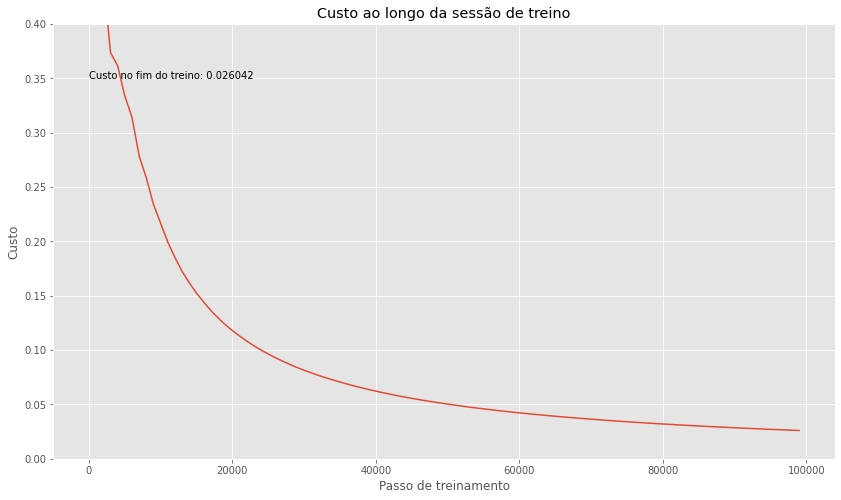

In [ ]:
import matplotlib.pyplot as plt

# Plot do custo total
plt.style.use("ggplot")
plt.figure(figsize = (14, 8))
plt.plot(passo, custo)
plt.ylim(0, 0.4)
plt.title("Custo ao longo da sessão de treino")
plt.ylabel("Custo")
plt.xlabel("Passo de treinamento")
plt.text(0, 0.35, "Custo no fim do treino: {:f}".format(custo[-1]))
plt.show()

Execução dos testes

In [ ]:
def forward(X, y, w1, w2, b1, b2):
    for index in range(len(X)):
        X_i = X[index].reshape((n_inputs, 1))
        y_i = y[index].reshape((n_outputs, 1))
        z1 = np.matmul(w1, X_i) + b1
        a1 = sigmoid(z1)
        z2 = np.matmul(w2, a1) + b2
        a2 = sigmoid(z2)
        print("Teste:", X[index],"/alvo =", y[index], " Predição= ", a2[0][0], " Arredondado=", np.round(a2[0][0]))


In [ ]:
# Teste
forward(binary_i, binary_o, w1, w2, b1, b2)

Teste: [1 0] /alvo = [1]  Predição =  0.9770776246250463  Arredondado= 1.0
Teste: [0 1] /alvo = [1]  Predição =  0.97720612386328  Arredondado= 1.0
Teste: [1 1] /alvo = [0]  Predição =  0.02782196638103838  Arredondado= 0.0
Teste: [0 0] /alvo = [0]  Predição =  0.01357904217689329  Arredondado= 0.0


# Perceptron

Código base.

In [ ]:
import numpy as np

def funcaoativacao(v):
	  """ Função de ativação. v deve ser um escalar """  
	  if v >= 0:
		   return 1
	  else:
		   return 0

def perceptron(x, peso, bias):
    """ Função que implementa um perceptron com vetor de pessos w e bias b """
    v = np.dot(peso, x) + bias
    # Converte para binário
    y = funcaoativacao(v)    
    return y

## Not

https://towardsdatascience.com/perceptrons-logical-functions-and-the-xor-problem-37ca5025790a

In [ ]:
def NOT_percep(entrada):
	return perceptron(entrada, peso=-1, bias=0.5)

print("NOT(0) = {}".format(NOT_percep(0)))
print("NOT(1) = {}".format(NOT_percep(1)))

NOT(0) = 1
NOT(1) = 0


## And

In [ ]:
def AND_percep(entrada):
    peso = np.array([1, 1])    
    bias = -1.5
    return perceptron(entrada, peso, bias)

# Teste
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


## Or

In [ ]:
def OR_percep(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))



OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


## XOR

In [ ]:
def XOR_net(x):
    gate_1 = AND_percep(x)
    gate_2 = NOT_percep(gate_1)
    gate_3 = OR_percep(x)
    novox = np.array([gate_2, gate_3])
    saida = AND_percep(novox)
    return saida

print("XOR({}, {}) = {}".format(1, 1, XOR_net(example1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example2)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example3)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example4)))

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0
